In [8]:
import wandb
run = wandb.init(project='nb_idle_time_prediction_classification')

In [41]:
wandb.finish()

# Main

In [13]:
import pandas as pd
import numpy as np

# read CSV
df = pd.read_csv('../data/df_points/final_df_points_18_21.csv')

In [14]:
# event del Index Column
df = df.sort_values(by='dt_start', ignore_index=True)
df.head()

,bike_id,lat,lng,dt_start,dt_end,hex_id,hex_enc,temp,rain,snow,month,day,start_min,over_night,idle_time_next_day,idle_time
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,195,10.80,0.0,0.0,12,6,1427,1,821,12
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,195,10.80,0.0,0.0,12,6,1427,1,1439,12
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,81,10.80,0.0,0.0,12,6,1437,1,1439,2
3,41851,51.332415,12.395158,1514764800,1514851199,881f1a1659fffff,81,10.86,0.0,0.0,1,0,0,1,82,1439
4,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,195,10.86,0.0,0.0,1,0,0,0,0,821


0.25      56.0
0.50     195.0
0.75     488.0
1.00    1439.0
Name: idle_time, dtype: float64

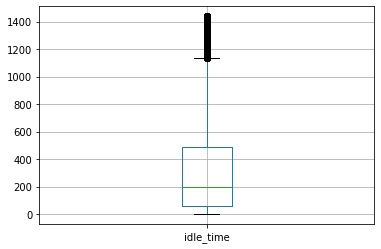

In [15]:
boxplot = df.boxplot(column=['idle_time'])
df['idle_time'].quantile([.25, .5,.75,1])

In [16]:
#add classification target
def f(row):
    if row['idle_time'] < 56:
        val = 1
    elif row['idle_time'] < 195:
        val = 2
    elif row['idle_time'] < 488:
        val = 3
    else:
        val = 4
    return val

df['idle_time_class'] = df.apply(f, axis=1)

In [39]:
df.head()

,bike_id,lat,lng,dt_start,dt_end,hex_id,hex_enc,temp,rain,snow,month,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,195,10.80,0.0,0.0,12,6,1427,1,821,12,1
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,195,10.80,0.0,0.0,12,6,1427,1,1439,12,1
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,81,10.80,0.0,0.0,12,6,1437,1,1439,2,1
3,41851,51.332415,12.395158,1514764800,1514851199,881f1a1659fffff,81,10.86,0.0,0.0,1,0,0,1,82,1439,4
4,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,195,10.86,0.0,0.0,1,0,0,0,0,821,4


In [40]:
df.to_csv("../data/df_points/df_points_18_21_class.csv",index=False)


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/df_points/df_points_18_21_class.csv")

In [3]:
df.head()

,bike_id,lat,lng,dt_start,dt_end,hex_id,hex_enc,temp,rain,snow,month,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,195,10.80,0.0,0.0,12,6,1427,1,821,12,1
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,195,10.80,0.0,0.0,12,6,1427,1,1439,12,1
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,81,10.80,0.0,0.0,12,6,1437,1,1439,2,1
3,41851,51.332415,12.395158,1514764800,1514851199,881f1a1659fffff,81,10.86,0.0,0.0,1,0,0,1,82,1439,4
4,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,195,10.86,0.0,0.0,1,0,0,0,0,821,4


In [4]:
TargetVariable=['idle_time_class']
Predictors=['bike_id', 'lat', 'lng', 'temp', 'rain', 'snow', 'dt_start','hex_enc','start_min', 'month', 'day']

In [5]:
X=df[Predictors].values
y=df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
#TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
#TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
#y=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2037726, 11)
(2037726, 1)
(509432, 11)
(509432, 1)


# WandB sweep

In [38]:
import wandb
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

WANDB_PROJECT_NAME = "hyperparameter-optimization"

with wandb.init(project=WANDB_PROJECT_NAME):

    sweep_id = wandb.sweep("/config/config_rfc.yaml")

    config = wandb.config
    rfc = RandomForestClassifier(
        bootstrap=config.bootstrap,
        max_depth = config.max_depth,
        max_features = config.max_features,
        min_samples_leaf = config.min_samples_leaf,
        min_samples_split = config.min_samples_split,
        n_estimators = config.n_estimators,
    )

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    wandb.log({'accuracy': accuracy_score(y_test, y_pred)})


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


CommError: dictionary update sequence element #0 has length 1; 2 is required


# MLPClassification

In [8]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# hidden_layer_sizes=(100,50,100), activation='relu', solver='adam', max_iter=1000, verbose=1,

cls = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', max_iter=1000, verbose=1,early_stopping=True)
cls.fit(X_train,y_train.ravel())

expected_y = y_test
y_pred = cls.predict(X_test)
print(cls.score(X_test, y_test))

#fig = ConfusionMatrixDisplay.from_predictions(y_pred,expected_y,cmap=plt.cm.Blues)
#fig.figure_.suptitle("Confusion Matrix")
#plt.show()

Iteration 1, loss = 1.10673097
Validation score: 0.489913
Iteration 2, loss = 1.06260320
Validation score: 0.508316
Iteration 3, loss = 1.04543599
Validation score: 0.515598
Iteration 4, loss = 1.03446066
Validation score: 0.521055
Iteration 5, loss = 1.02915016
Validation score: 0.521909
Iteration 6, loss = 1.02583790
Validation score: 0.523499
Iteration 7, loss = 1.02341968
Validation score: 0.524986
Iteration 8, loss = 1.02067069
Validation score: 0.524260
Iteration 9, loss = 1.01802101
Validation score: 0.526233
Iteration 10, loss = 1.01570089
Validation score: 0.528937
Iteration 11, loss = 1.01408616
Validation score: 0.528431
Iteration 12, loss = 1.01251169
Validation score: 0.528107
Iteration 13, loss = 1.01148359
Validation score: 0.529270
Iteration 14, loss = 1.01085827
Validation score: 0.531935
Iteration 15, loss = 1.01000762
Validation score: 0.531258
Iteration 16, loss = 1.00910869
Validation score: 0.531327
Iteration 17, loss = 1.00872985
Validation score: 0.532180
Iterat

In [33]:
import wandb
#run = wandb.init(project='nb_idle_time_prediction', name="MLPClassifier")
run = wandb.init(project='nb_idle_time_prediction_classification', name="MLPClassifier")
labels = np.ndarray((4,), buffer=np.array(['very short','short','long','very long']))
y_probas = cls.predict_proba(X_test)

wandb.sklearn.plot_classifier(cls,
                              X_train, X_test,
                              y_train, y_test,
                              y_pred, y_probas,
                              labels,
                              model_name='MLPClassifier')

wandb.finish()

wandb: 
wandb: Plotting MLPClassifier.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.


IndexError: index 3 is out of bounds for axis 0 with size 3

In [31]:
y_probas.shape

(509432, 4)

In [ ]:
y_probas = cls.predict_proba(X_test)
wandb.sklearn.plot_roc(y_test, y_probas)
wandb.sklearn.plot_confusion_matrix(y_test.ravel(), y_pred.ravel())
wandb.finish()

In [14]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(expected_y, y_pred)

explained_variance:  0.1761
r2:  0.1715
MAE:  0.6225
MSE:  1.0356
RMSE:  1.0176


# RandomForestClassifier

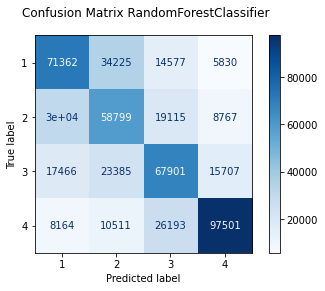

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train.ravel())

rf_y_pred = rfc.predict(X_test)

rfc.score(X_test,y_test)

fig = ConfusionMatrixDisplay.from_predictions(rf_y_pred,expected_y,cmap=plt.cm.Blues)
fig.figure_.suptitle("Confusion Matrix RandomForestClassifier")
plt.show()

In [16]:
import pandas as pd

feature_imp = pd.Series(rfc.feature_importances_,index=Predictors).sort_values(ascending=False)
feature_imp

start_min    0.260508
lat          0.136624
lng          0.136375
bike_id      0.119907
dt_start     0.114776
temp         0.097526
hex_enc      0.052168
day          0.038524
month        0.028918
rain         0.014304
snow         0.000372
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


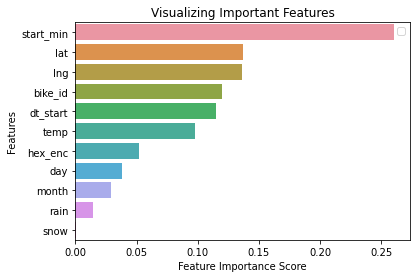

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Gridsearch
# MLPClassifier

In [25]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [26]:
from sklearn.metrics import make_scorer

def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

model = MLPClassifier(activation='relu', solver='adam', max_iter=1000, verbose=1, early_stopping=True)
param_search = {
    'hidden_layer_sizes': [(10,10), (10,10,10), (10,10,10,10),
                           (50,50), (50,50,50), (50,50,50,50),
                           (100,100), (100,100,100), (100,100,100,100)]}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

Iteration 1, loss = 1.22805786
Validation score: 0.434686
Iteration 2, loss = 1.15623826
Validation score: 0.442675
Iteration 3, loss = 1.14221852
Validation score: 0.450016
Iteration 4, loss = 1.12737665
Validation score: 0.466857
Iteration 5, loss = 1.11523973
Validation score: 0.473281
Iteration 6, loss = 1.10564360
Validation score: 0.477275
Iteration 7, loss = 1.09821779
Validation score: 0.478031
Iteration 8, loss = 1.09302893
Validation score: 0.480730
Iteration 9, loss = 1.08911474
Validation score: 0.482241
Iteration 10, loss = 1.08630603
Validation score: 0.491525
Iteration 11, loss = 1.08394773
Validation score: 0.489528
Iteration 12, loss = 1.08193755
Validation score: 0.489636
Iteration 13, loss = 1.07986552
Validation score: 0.490986
Iteration 14, loss = 1.07827433
Validation score: 0.494170
Iteration 15, loss = 1.07680160
Validation score: 0.494710
Iteration 16, loss = 1.07522176
Validation score: 0.492011
Iteration 17, loss = 1.07407174
Validation score: 0.495898
Iterat

In [35]:
y_true_mlp = y_test
y_pred_mlp = best_model.predict(X_test)

regression_results(y_true_mlp, y_pred_mlp)

explained_variance:  0.1607
r2:  0.1556
MAE:  0.6252
MSE:  1.0555
RMSE:  1.0274


In [45]:
print(best_model)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 50, 50, 50),
              max_iter=1000, verbose=1)


In [46]:
wandb.finish()

In [29]:
imp = best_model.feature_importances_
X_train = pd.DataFrame(X_train,columns=Predictors)
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

# inverse transformation y_test y_pred

In [58]:
# transform back
#X_back = PredictorScalerFit.inverse_transform(X)
predicted_y = y_pred.reshape(-1, 1)
#y_real_back = TargetVarScalerFit.inverse_transform(y_test)
#y_pred_back =  TargetVarScalerFit.inverse_transform(predicted_y)

In [59]:
#result_compare = pd.DataFrame(y_real_back,columns=['real'])

In [61]:
#result_compare['pred'] = y_pred_back

In [62]:
#result_compare

,real,pred
0,648.0,1144.472840
1,38.0,120.372312
2,1439.0,865.256972
3,268.0,865.532030
4,902.0,300.368490
...,...,...
487083,498.0,272.307613
487084,82.0,241.258410
487085,175.0,348.363753
487086,306.0,259.579036
